In [1]:
import nibabel as nib
import numpy as np
import glob
import pandas as pd
import subprocess as sp
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# ROI-level template, Gordon
template = nib.load('/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/test_data/Paper_Surface_Files/Gordon333_FreesurferSubcortical.32k_fs_LR.dlabel.nii')
print(template)
print(template.header)
print(template.shape)

template_labels = template.header.get_axis(0).label
len(template_labels[0])

voxel_all_index = template.get_fdata()
print(len(voxel_all_index[0]))
voxel_index = np.array([list(voxel_all_index[0][0:59412])])
print(len(voxel_index[0]))
voxel_index

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(1, 91282)
91282
59412


array([[ 48., 264., 302., ...,   0.,   0.,   0.]])

In [3]:
template_labels[0]

{0: ('???', (1.0, 1.0, 1.0, 0.0)),
 1: ('L_None_1', (1.0, 1.0, 1.0, 1.0)),
 2: ('L_None_2', (1.0, 1.0, 1.0, 1.0)),
 3: ('L_None_3', (1.0, 1.0, 1.0, 1.0)),
 4: ('L_None_4', (1.0, 1.0, 1.0, 1.0)),
 5: ('L_None_5', (1.0, 1.0, 1.0, 1.0)),
 6: ('L_None_6', (1.0, 1.0, 1.0, 1.0)),
 7: ('L_None_7', (1.0, 1.0, 1.0, 1.0)),
 8: ('L_None_8', (1.0, 1.0, 1.0, 1.0)),
 9: ('L_None_9', (1.0, 1.0, 1.0, 1.0)),
 10: ('L_None_10', (1.0, 1.0, 1.0, 1.0)),
 11: ('L_None_11', (1.0, 1.0, 1.0, 1.0)),
 12: ('L_None_12', (1.0, 1.0, 1.0, 1.0)),
 13: ('L_None_13', (1.0, 1.0, 1.0, 1.0)),
 14: ('L_None_14', (1.0, 1.0, 1.0, 1.0)),
 15: ('L_None_15', (1.0, 1.0, 1.0, 1.0)),
 16: ('L_None_16', (1.0, 1.0, 1.0, 1.0)),
 17: ('L_None_17', (1.0, 1.0, 1.0, 1.0)),
 18: ('L_None_18', (1.0, 1.0, 1.0, 1.0)),
 19: ('L_None_19', (1.0, 1.0, 1.0, 1.0)),
 20: ('L_None_20', (1.0, 1.0, 1.0, 1.0)),
 21: ('L_None_21', (1.0, 1.0, 1.0, 1.0)),
 22: ('R_None_22', (1.0, 1.0, 1.0, 1.0)),
 23: ('R_None_23', (1.0, 1.0, 1.0, 1.0)),
 24: ('R_None_24'

In [4]:
roi_list = []
for i in range(334):
    roi_list.append(template_labels[0][i][0])
roi_list = np.array(roi_list)
print(len(roi_list))
roi_list

334


array(['???', 'L_None_1', 'L_None_2', 'L_None_3', 'L_None_4', 'L_None_5',
       'L_None_6', 'L_None_7', 'L_None_8', 'L_None_9', 'L_None_10',
       'L_None_11', 'L_None_12', 'L_None_13', 'L_None_14', 'L_None_15',
       'L_None_16', 'L_None_17', 'L_None_18', 'L_None_19', 'L_None_20',
       'L_None_21', 'R_None_22', 'R_None_23', 'R_None_24', 'R_None_25',
       'R_None_26', 'R_None_27', 'R_None_28', 'R_None_29', 'R_None_30',
       'R_None_31', 'R_None_32', 'R_None_33', 'R_None_34', 'R_None_35',
       'R_None_36', 'R_None_37', 'R_None_38', 'R_None_39', 'R_None_40',
       'R_None_41', 'R_None_42', 'R_None_43', 'R_None_44', 'R_None_45',
       'R_None_46', 'R_None_47', 'L_Default_1', 'L_Default_2',
       'L_Default_3', 'L_Default_4', 'L_Default_5', 'L_Default_6',
       'L_Default_7', 'L_Default_8', 'L_Default_9', 'L_Default_10',
       'L_Default_11', 'L_Default_12', 'L_Default_13', 'L_Default_14',
       'L_Default_15', 'L_Default_16', 'L_Default_17', 'L_Default_18',
       'L_Defa

In [5]:
networks_names = ['None', 'Default', 'ParietoOccip', 'FrontoParietal', 'Salience', 'CinguloOperc', 'MedialParietal', 
                  'DorsalAttn', 'VentralAttn', 'Visual', 'SMhand', 'SMmouth', 'Auditory']
plot_networks_names = ['Default', 'ParietoOccip', 'FrontoParietal', 'Salience', 'CinguloOperc', 'ParietalMem', 
                  'DorsalAttn', 'VentralAttn', 'Visual', 'SomoMoto', 'LatSomoMoto', 'Auditory']

In [6]:
# Create weights for network averages 
def get_weights():
    roi_voxel_count_list = []
    for region in roi_list:
        roi_count = 0
        for entry in voxel_index[0]:
            roi = template_labels[0][entry][0]
            if region == roi:
                roi_count = roi_count + 1
#         print(region, roi, roi_count)
        roi_voxel_count_list.append([region, roi_count])
    print(len(roi_voxel_count_list))
    
    net_voxel_count_list = []
    for net in networks_names:
        net_voxel_count = 0
        for i in range(len(roi_voxel_count_list)):
            if roi_voxel_count_list[i][0].find(net) > 0:
                    net_voxel_count = net_voxel_count + roi_voxel_count_list[i][1]
        net_voxel_count_list.append([net, net_voxel_count])
    print(len(net_voxel_count_list))
    
    roi_weight_list = []
    for i in range(len(roi_voxel_count_list)):
        roi_name = roi_voxel_count_list[i][0]
        if roi_name == '???':
                roi_weight_list.append([roi_name, 1])
        for j in range(len(net_voxel_count_list)):
            net_name = net_voxel_count_list[j][0]
            if roi_name.find(net_name) > 0:
                weight = roi_voxel_count_list[i][1] / net_voxel_count_list[j][1] 
                roi_weight_list.append([roi_name, weight])
    return roi_weight_list

In [7]:
roi_weights = get_weights()
print(len(roi_weights))

334
13
334


In [10]:
# Weighted network averages 
def Make_Network_Plots(file_list):
    output_list, error_df_list = [], []
    for entry in file_list:
        corr_data = np.arctanh(np.array(nib.load(entry).get_fdata())) #Meta-correlation values
#         corr_data = np.array(nib.load(entry).get_fdata())             #Mean Values
        print(corr_data.shape)
        
        voxel_corr_roi_list = []
        for i, entry in enumerate(voxel_index[0]):
            corr_val = corr_data[0][i]
            roi = template_labels[0][entry][0]
        #     print(i, roi, corr_val)
            voxel_corr_roi_list.append([roi, corr_val])
            
        corr_map = []
        for region in roi_list:
            mean_count = 0
            mean_sum = 0
            for entry in voxel_corr_roi_list:
                roi = entry[0]
                corr_val = entry[1]
                if region == roi:
                    mean_count = mean_count + 1
                    mean_sum = mean_sum + corr_val
            if region == '???':
                mean_val = 0
            else:
                mean_val = mean_sum / mean_count
        #     print(region, mean_val)
            corr_map.append([region, mean_val])
        print(len(corr_map))
        
        voxel_data = []
        for entry in voxel_index[0]:
            roi = template_labels[0][entry][0]
#             print(entry, roi)
            for entry in corr_map:
                if entry[0] == roi:
                    voxel_data.append(entry[1])
                    
        none_list, default_list, po_list, fp_list, salience_list, co_list, mp_list = [], [], [], [], [], [], []
        da_list, va_list, visual_list, smhand_list, smmouth_list, aud_list = [], [], [], [], [], []
        for i in range(np.shape(corr_map)[0]):
            corr_val = corr_map[i][1]
            corr_label = roi_list[i]
            weight = roi_weights[i][1]
#             print(corr_label, corr_val)

            if corr_label.find('None') > 0:
                none_list.append([corr_val, weight])
            if corr_label.find('Default') > 0:
                default_list.append([corr_val, weight])
            if corr_label.find('ParietoOccip') > 0:
                po_list.append([corr_val, weight])
            if corr_label.find('FrontoParietal') > 0:
                fp_list.append([corr_val, weight])
            if corr_label.find('Salience') > 0:
                salience_list.append([corr_val, weight])
            if corr_label.find('CinguloOperc') > 0:
                co_list.append([corr_val, weight])
            if corr_label.find('MedialParietal') > 0:
                mp_list.append([corr_val, weight])
            if corr_label.find('DorsalAttn') > 0:
                da_list.append([corr_val, weight])
            if corr_label.find('VentralAttn') > 0:
                va_list.append([corr_val, weight])
            if corr_label.find('Visual') > 0:
                visual_list.append([corr_val, weight])
            if corr_label.find('SMhand') > 0:
                smhand_list.append([corr_val, weight])
            if corr_label.find('SMmouth') > 0:
                smmouth_list.append([corr_val, weight])
            if corr_label.find('Auditory') > 0:
                aud_list.append([corr_val, weight])
        print(len(none_list),len(default_list),len(po_list),len(fp_list),len(salience_list),len(co_list),len(mp_list),
              len(da_list),len(va_list),len(visual_list),len(smhand_list),len(smmouth_list),len(aud_list))
                
        mean_corr_list = []
        error_df = pd.DataFrame()
        for ii, network_list in enumerate([default_list, po_list, fp_list, salience_list, co_list, mp_list, da_list, va_list, 
                             visual_list, smhand_list, smmouth_list, aud_list]):
            vals = [entry[0] for entry in network_list]
            weights = [entry[1] for entry in network_list]
#             print(vals)
#             print(weights)
            mean_corr = np.average(vals, weights=weights)
            mean_corr_list.append(mean_corr)
            error_df[plot_networks_names[ii]] = pd.Series(vals)
            error_df[plot_networks_names[ii]+'_weights'] = pd.Series(weights)
        print(len(mean_corr_list))
        
        mean_corr_list_sort, plot_networks_names_sort, networks_names_sort = (list(t) for t in zip(*sorted(
                                zip(mean_corr_list, plot_networks_names, networks_names), reverse=True)))
            
        output_list.append([plot_networks_names_sort, mean_corr_list_sort])
        error_df_list.append(error_df)
        
    return output_list, error_df_list

In [63]:
# Un-weighted Average 
def Make_Network_Plots(file_list):
    output_list, error_df_list = [], []
    for entry in file_list:
        corr_data = np.arctanh(np.array(nib.load(entry).get_fdata())) #Meta-correlation values
#         corr_data = np.array(nib.load(entry).get_fdata())             #Mean Values
        print(corr_data.shape)
        
        voxel_corr_roi_list = []
        for i, entry in enumerate(voxel_index[0]):
            corr_val = corr_data[0][i]
            roi = template_labels[0][entry][0]
        #     print(i, roi, corr_val)
            voxel_corr_roi_list.append([roi, corr_val])
            
        corr_map = []
        for region in roi_list:
            mean_count = 0
            mean_sum = 0
            for entry in voxel_corr_roi_list:
                roi = entry[0]
                corr_val = entry[1]
                if region == roi:
                    mean_count = mean_count + 1
                    mean_sum = mean_sum + corr_val
            if region == '???':
                mean_val = 0
            else:
                mean_val = mean_sum / mean_count
        #     print(region, mean_val)
            corr_map.append([region, mean_val])
        print(len(corr_map))
        
        voxel_data = []
        for entry in voxel_index[0]:
            roi = template_labels[0][entry][0]
#             print(entry, roi)
            for entry in corr_map:
                if entry[0] == roi:
                    voxel_data.append(entry[1])
                    
        none_list, default_list, po_list, fp_list, salience_list, co_list, mp_list = [], [], [], [], [], [], []
        da_list, va_list, visual_list, smhand_list, smmouth_list, aud_list = [], [], [], [], [], []
        for i in range(np.shape(corr_map)[0]):
            corr_val = corr_map[i][1]
            corr_label = roi_list[i]
#             print(corr_label, corr_val)

            if corr_label.find('None') > 0:
                none_list.append(corr_val)
            if corr_label.find('Default') > 0:
                default_list.append(corr_val)
            if corr_label.find('ParietoOccip') > 0:
                po_list.append(corr_val)
            if corr_label.find('FrontoParietal') > 0:
                fp_list.append(corr_val)
            if corr_label.find('Salience') > 0:
                salience_list.append(corr_val)
            if corr_label.find('CinguloOperc') > 0:
                co_list.append(corr_val)
            if corr_label.find('MedialParietal') > 0:
                mp_list.append(corr_val)
            if corr_label.find('DorsalAttn') > 0:
                da_list.append(corr_val)
            if corr_label.find('VentralAttn') > 0:
                va_list.append(corr_val)
            if corr_label.find('Visual') > 0:
                visual_list.append(corr_val)
            if corr_label.find('SMhand') > 0:
                smhand_list.append(corr_val)
            if corr_label.find('SMmouth') > 0:
                smmouth_list.append(corr_val)
            if corr_label.find('Auditory') > 0:
                aud_list.append(corr_val)
        print(len(none_list),len(default_list),len(po_list),len(fp_list),len(salience_list),len(co_list),len(mp_list),
              len(da_list),len(va_list),len(visual_list),len(smhand_list),len(smmouth_list),len(aud_list))
                
        mean_corr_list = []
        error_df = pd.DataFrame()
        for ii, network_list in enumerate([default_list, po_list, fp_list, salience_list, co_list, mp_list, da_list, va_list, 
                             visual_list, smhand_list, smmouth_list, aud_list]):
            mean_corr = np.mean(network_list)
            mean_corr_list.append(mean_corr)
            error_df[plot_networks_names[ii]] = pd.Series(network_list)
            error_df[plot_networks_names[ii]+'_weights'] = pd.Series()
        print(len(mean_corr_list))
        
        mean_corr_list_sort, plot_networks_names_sort, networks_names_sort = (list(t) for t in zip(*sorted(
                                zip(mean_corr_list, plot_networks_names, networks_names), reverse=True)))
            
        output_list.append([plot_networks_names_sort, mean_corr_list_sort])
        error_df_list.append(error_df)
        
    return output_list, error_df_list

In [64]:
# file_list = ['/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Mean_Myelin.32k_fs_LR.dscalar.nii', 
#               '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Mean_Thickness.32k_fs_LR.dscalar.nii']
file_list = ['/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Standard_Brain_Maps/MFMC_Both_Demeaned.32k_fs_LR.dscalar.nii', 
             '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Standard_Brain_Maps/TFMC_Both_Demeaned.32k_fs_LR.dscalar.nii', 
             '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Standard_Brain_Maps/MTMC_Both_Demeaned.32k_fs_LR.dscalar.nii']
# file_list = ['/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Subgroup_MC_Maps/MTMC_Group1.dscalar.nii', 
#              '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Subgroup_MC_Maps/MTMC_Group2.dscalar.nii']
# file_list = ['/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Old_Young_Subgroups/MTMC_young_Gordon_confoundreg.32k_fs_LR.dscalar.nii', 
#              '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Old_Young_Subgroups/MTMC_old_Gordon_confoundreg.32k_fs_LR.dscalar.nii']
plot_list, error_dfs = Make_Network_Plots(file_list)
print('\n ' + str(len(error_dfs)))
plot_list

(1, 59412)
334
47 41 8 24 4 40 5 32 23 39 38 8 24
12
(1, 59412)
334
47 41 8 24 4 40 5 32 23 39 38 8 24
12
(1, 59412)
334
47 41 8 24 4 40 5 32 23 39 38 8 24
12

 3


[[['Salience',
   'Visual',
   'SomoMoto',
   'ParietoOccip',
   'FrontoParietal',
   'DorsalAttn',
   'Default',
   'VentralAttn',
   'CinguloOperc',
   'ParietalMem',
   'LatSomoMoto',
   'Auditory'],
  [0.9250540883423908,
   0.6997718232735348,
   0.6909626470060334,
   0.6811663807328792,
   0.6653596326541945,
   0.6402180449713715,
   0.6330149727353165,
   0.6079646656713543,
   0.5708243039507852,
   0.5394080990852288,
   0.5100511164152212,
   0.39615518613384254]],
 [['SomoMoto',
   'LatSomoMoto',
   'VentralAttn',
   'ParietoOccip',
   'Salience',
   'DorsalAttn',
   'Visual',
   'Default',
   'CinguloOperc',
   'FrontoParietal',
   'Auditory',
   'ParietalMem'],
  [0.31576202765164385,
   0.2261375371166145,
   0.221465061568077,
   0.2191091723002605,
   0.20234445759466202,
   0.19153162378274527,
   0.19106943413275673,
   0.1899118444248666,
   0.18963479237271802,
   0.18643376042845725,
   0.18561056968195436,
   0.18343855748406085]],
 [['SomoMoto',
   'LatSomoMoto

# Use the following to make bar graphs showing mean meta-corr for each network at the voxel or ROI level.

In [12]:
# This block of code makes the order of the networks be the same in the 3 plots at voxel level.
# Note: we use ordering of voxel MFMC for all bar plots
mfmc_plot_order = plot_list[0][0]
mfmc_plot_values = plot_list[0][1]
tfmc_plot_order = plot_list[1][0]
tfmc_plot_values = plot_list[1][1]
mtmc_plot_order = plot_list[2][0]
mtmc_plot_values = plot_list[2][1]

new_tfmc_plot_order, new_tfmc_plot_values, new_mtmc_plot_order, new_mtmc_plot_values = [], [], [], []
for net in mfmc_plot_order:
    for i in range(len(mfmc_plot_order)):
        if tfmc_plot_order[i] == net:
            new_tfmc_plot_order.append(net)
            new_tfmc_plot_values.append(tfmc_plot_values[i])
        if mtmc_plot_order[i] == net:
            new_mtmc_plot_order.append(net)
            new_mtmc_plot_values.append(mtmc_plot_values[i])
            
new_plot_list = [[mfmc_plot_order, mfmc_plot_values], [new_tfmc_plot_order, new_tfmc_plot_values], 
                 [new_mtmc_plot_order, new_mtmc_plot_values]]

print(new_plot_list)

# Orders erros the same way as the plot networks 
error_order = []
for entry in new_plot_list[0][0]:
    error_order.append(entry)
    error_order.append(entry+'_weights')
error_dfs[0] = error_dfs[0].reindex(error_order, axis=1)
error_dfs[1] = error_dfs[1].reindex(error_order, axis=1)
error_dfs[2] = error_dfs[2].reindex(error_order, axis=1)

[[['Salience', 'SomoMoto', 'ParietoOccip', 'Visual', 'FrontoParietal', 'DorsalAttn', 'VentralAttn', 'ParietalMem', 'CinguloOperc', 'Default', 'LatSomoMoto', 'Auditory'], [0.9171789631714724, 0.6919043924271598, 0.6914703471325558, 0.689363715198933, 0.6437465727857186, 0.6399525957502019, 0.5973287760017213, 0.5700000139211198, 0.5293720561049069, 0.5194710609632756, 0.4658386913750633, 0.4024693247735541]], [['Salience', 'SomoMoto', 'ParietoOccip', 'Visual', 'FrontoParietal', 'DorsalAttn', 'VentralAttn', 'ParietalMem', 'CinguloOperc', 'Default', 'LatSomoMoto', 'Auditory'], [0.2012646718699099, 0.3102986601742979, 0.18765919169120976, 0.18906333686529317, 0.18112831195627732, 0.19669829267181393, 0.21498527023769795, 0.18957101339361737, 0.18664080350972323, 0.17437167981898707, 0.2269867698218485, 0.19008934565765462]], [['Salience', 'SomoMoto', 'ParietoOccip', 'Visual', 'FrontoParietal', 'DorsalAttn', 'VentralAttn', 'ParietalMem', 'CinguloOperc', 'Default', 'LatSomoMoto', 'Auditory']

In [18]:
#This block of code makes the order of the networks be the same in the 3 plots for ROI-level.
order = ['Salience', 'SomoMoto',  'ParietoOccip', 'Visual', 'FrontoParietal', 'DorsalAttn', 'VentralAttn', 
         'ParietalMem', 'CinguloOperc', 'Default', 'LatSomoMoto', 'Auditory']

mfmc_plot_order = plot_list[0][0]
mfmc_plot_values = plot_list[0][1]
tfmc_plot_order = plot_list[1][0]
tfmc_plot_values = plot_list[1][1]
mtmc_plot_order = plot_list[2][0]
mtmc_plot_values = plot_list[2][1]

new_mfmc_plot_order, new_mfmc_plot_values = [], [] 
new_tfmc_plot_order, new_tfmc_plot_values, new_mtmc_plot_order, new_mtmc_plot_values = [], [], [], []
for net in order:
    for i in range(len(order)):
        if mfmc_plot_order[i] == net:
            new_mfmc_plot_order.append(net)
            new_mfmc_plot_values.append(mfmc_plot_values[i])
        if tfmc_plot_order[i] == net:
            new_tfmc_plot_order.append(net)
            new_tfmc_plot_values.append(tfmc_plot_values[i])
        if mtmc_plot_order[i] == net:
            new_mtmc_plot_order.append(net)
            new_mtmc_plot_values.append(mtmc_plot_values[i])
            
new_plot_list = [[new_mfmc_plot_order, new_mfmc_plot_values], [new_tfmc_plot_order, new_tfmc_plot_values], 
                 [new_mtmc_plot_order, new_mtmc_plot_values]]

print(new_plot_list)
print(len(new_plot_list[0][0]), len(new_plot_list[1][0]), len(new_plot_list[2][0]))

# Orders erros the same way as the plot networks 
error_order = []
for entry in new_plot_list[0][0]:
    error_order.append(entry)
    error_order.append(entry+'_weights')
error_dfs[0] = error_dfs[0].reindex(error_order, axis=1)
error_dfs[1] = error_dfs[1].reindex(error_order, axis=1)
error_dfs[2] = error_dfs[2].reindex(error_order, axis=1)

[[['Salience', 'SomoMoto', 'ParietoOccip', 'Visual', 'FrontoParietal', 'DorsalAttn', 'VentralAttn', 'ParietalMem', 'CinguloOperc', 'Default', 'LatSomoMoto', 'Auditory'], [0.9669144619886139, 0.9223801353774216, 0.6820065529502374, 0.7871747172465705, 0.6676714712034404, 0.6999721896897593, 0.604540024686422, 0.52065221711407, 0.5292532816661835, 0.397997917721405, 0.6775559031778813, 0.5048125503674863]], [['Salience', 'SomoMoto', 'ParietoOccip', 'Visual', 'FrontoParietal', 'DorsalAttn', 'VentralAttn', 'ParietalMem', 'CinguloOperc', 'Default', 'LatSomoMoto', 'Auditory'], [0.5514880368743011, 0.6542669188076972, 0.5277291429804378, 0.6431139504729863, 0.5378256898374365, 0.5641293172165389, 0.5190283165936782, 0.5166787187568702, 0.47595930462931996, 0.43811119596137393, 0.40360252727239326, 0.4810473960267887]], [['Salience', 'SomoMoto', 'ParietoOccip', 'Visual', 'FrontoParietal', 'DorsalAttn', 'VentralAttn', 'ParietalMem', 'CinguloOperc', 'Default', 'LatSomoMoto', 'Auditory'], [0.4834

In [19]:
colors = []
labels = []
for entry in new_tfmc_plot_order:
    if entry == 'Salience':
        color = (160,82,45)
        label = 'Sal'
    if entry == 'VentralAttn':
        color = (255,165,0)
        label = 'VA'
    if entry == 'Default':
        color = (0,0,0)
        label = 'Def'
    if entry == 'FrontoParietal':
        color = (128,128,128)
        label = 'FP'
    if entry == 'SomoMoto':
        color = (0,255,0)
        label = 'SM'
    if entry == 'Visual':
        color = (255,255,0)
        label = 'Vis'
    if entry == 'DorsalAttn':
        color = (255,0,0)
        label = 'DA'
    if entry == 'ParietoOccip':
        color = (0,255,255)
        label = 'PO'
    if entry == 'CinguloOperc':
        color = (0,0,255)
        label = 'CO'
    if entry == 'ParietalMem':
        color = (0,191,255)
        label = 'PM'
    if entry == 'LatSomoMoto':
        color = (0,128,128)
        label = 'LSM'
    if entry == 'Auditory':
        color = (255,0,255)
        label = 'Aud'
    colors.append(color)
    labels.append(label)

colors = list(np.array(colors)/255.0)

In [20]:
def weighted_bootstrap(data, weights, n=1000, func=np.average):
    """
    Generate `n` bootstrap samples, evaluating `func`
    at each resampling. `bootstrap` returns a function,
    which can be called to obtain confidence intervals
    of interest.
    """
    simulations = list()
    sample_size = len(data)
    xbar_init = np.average(data, weights=weights)
    for c in range(n):
        idx = np.random.choice(np.arange(sample_size), sample_size, replace=True)
        data_sample = data[idx]
        weight_sample = weights[idx]
        simulations.append(func(data_sample, weights=weight_sample))
    simulations.sort()
    def ci(p):
        """
        Return 2-sided symmetric confidence interval specified
        by p.
        """
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_indx = int(np.floor(n*l_pval))
        u_indx = int(np.floor(n*u_pval))
        return(simulations[l_indx],simulations[u_indx])
    return(ci)

In [21]:
ci_list_all = []
for i, data in enumerate(error_dfs):
    ci_list = []
    for ii in [0,2,4,6,8,10,12,14,16,18,20,22]:
        boot = weighted_bootstrap(data.iloc[:, ii].dropna().values, data.iloc[:, ii+1].dropna().values) # Voxel level
        ci = boot(0.95) # 95% confidence intervals
        ci_list.append(ci)
    ci_array = np.array(ci_list)
    ci_list = list(ci_array.T)
    ci_list = [new_plot_list[i][1] - ci_list[0],  ci_list[1] - new_plot_list[i][1]]
    ci_list_all.append(ci_list)
len(ci_list_all)

3

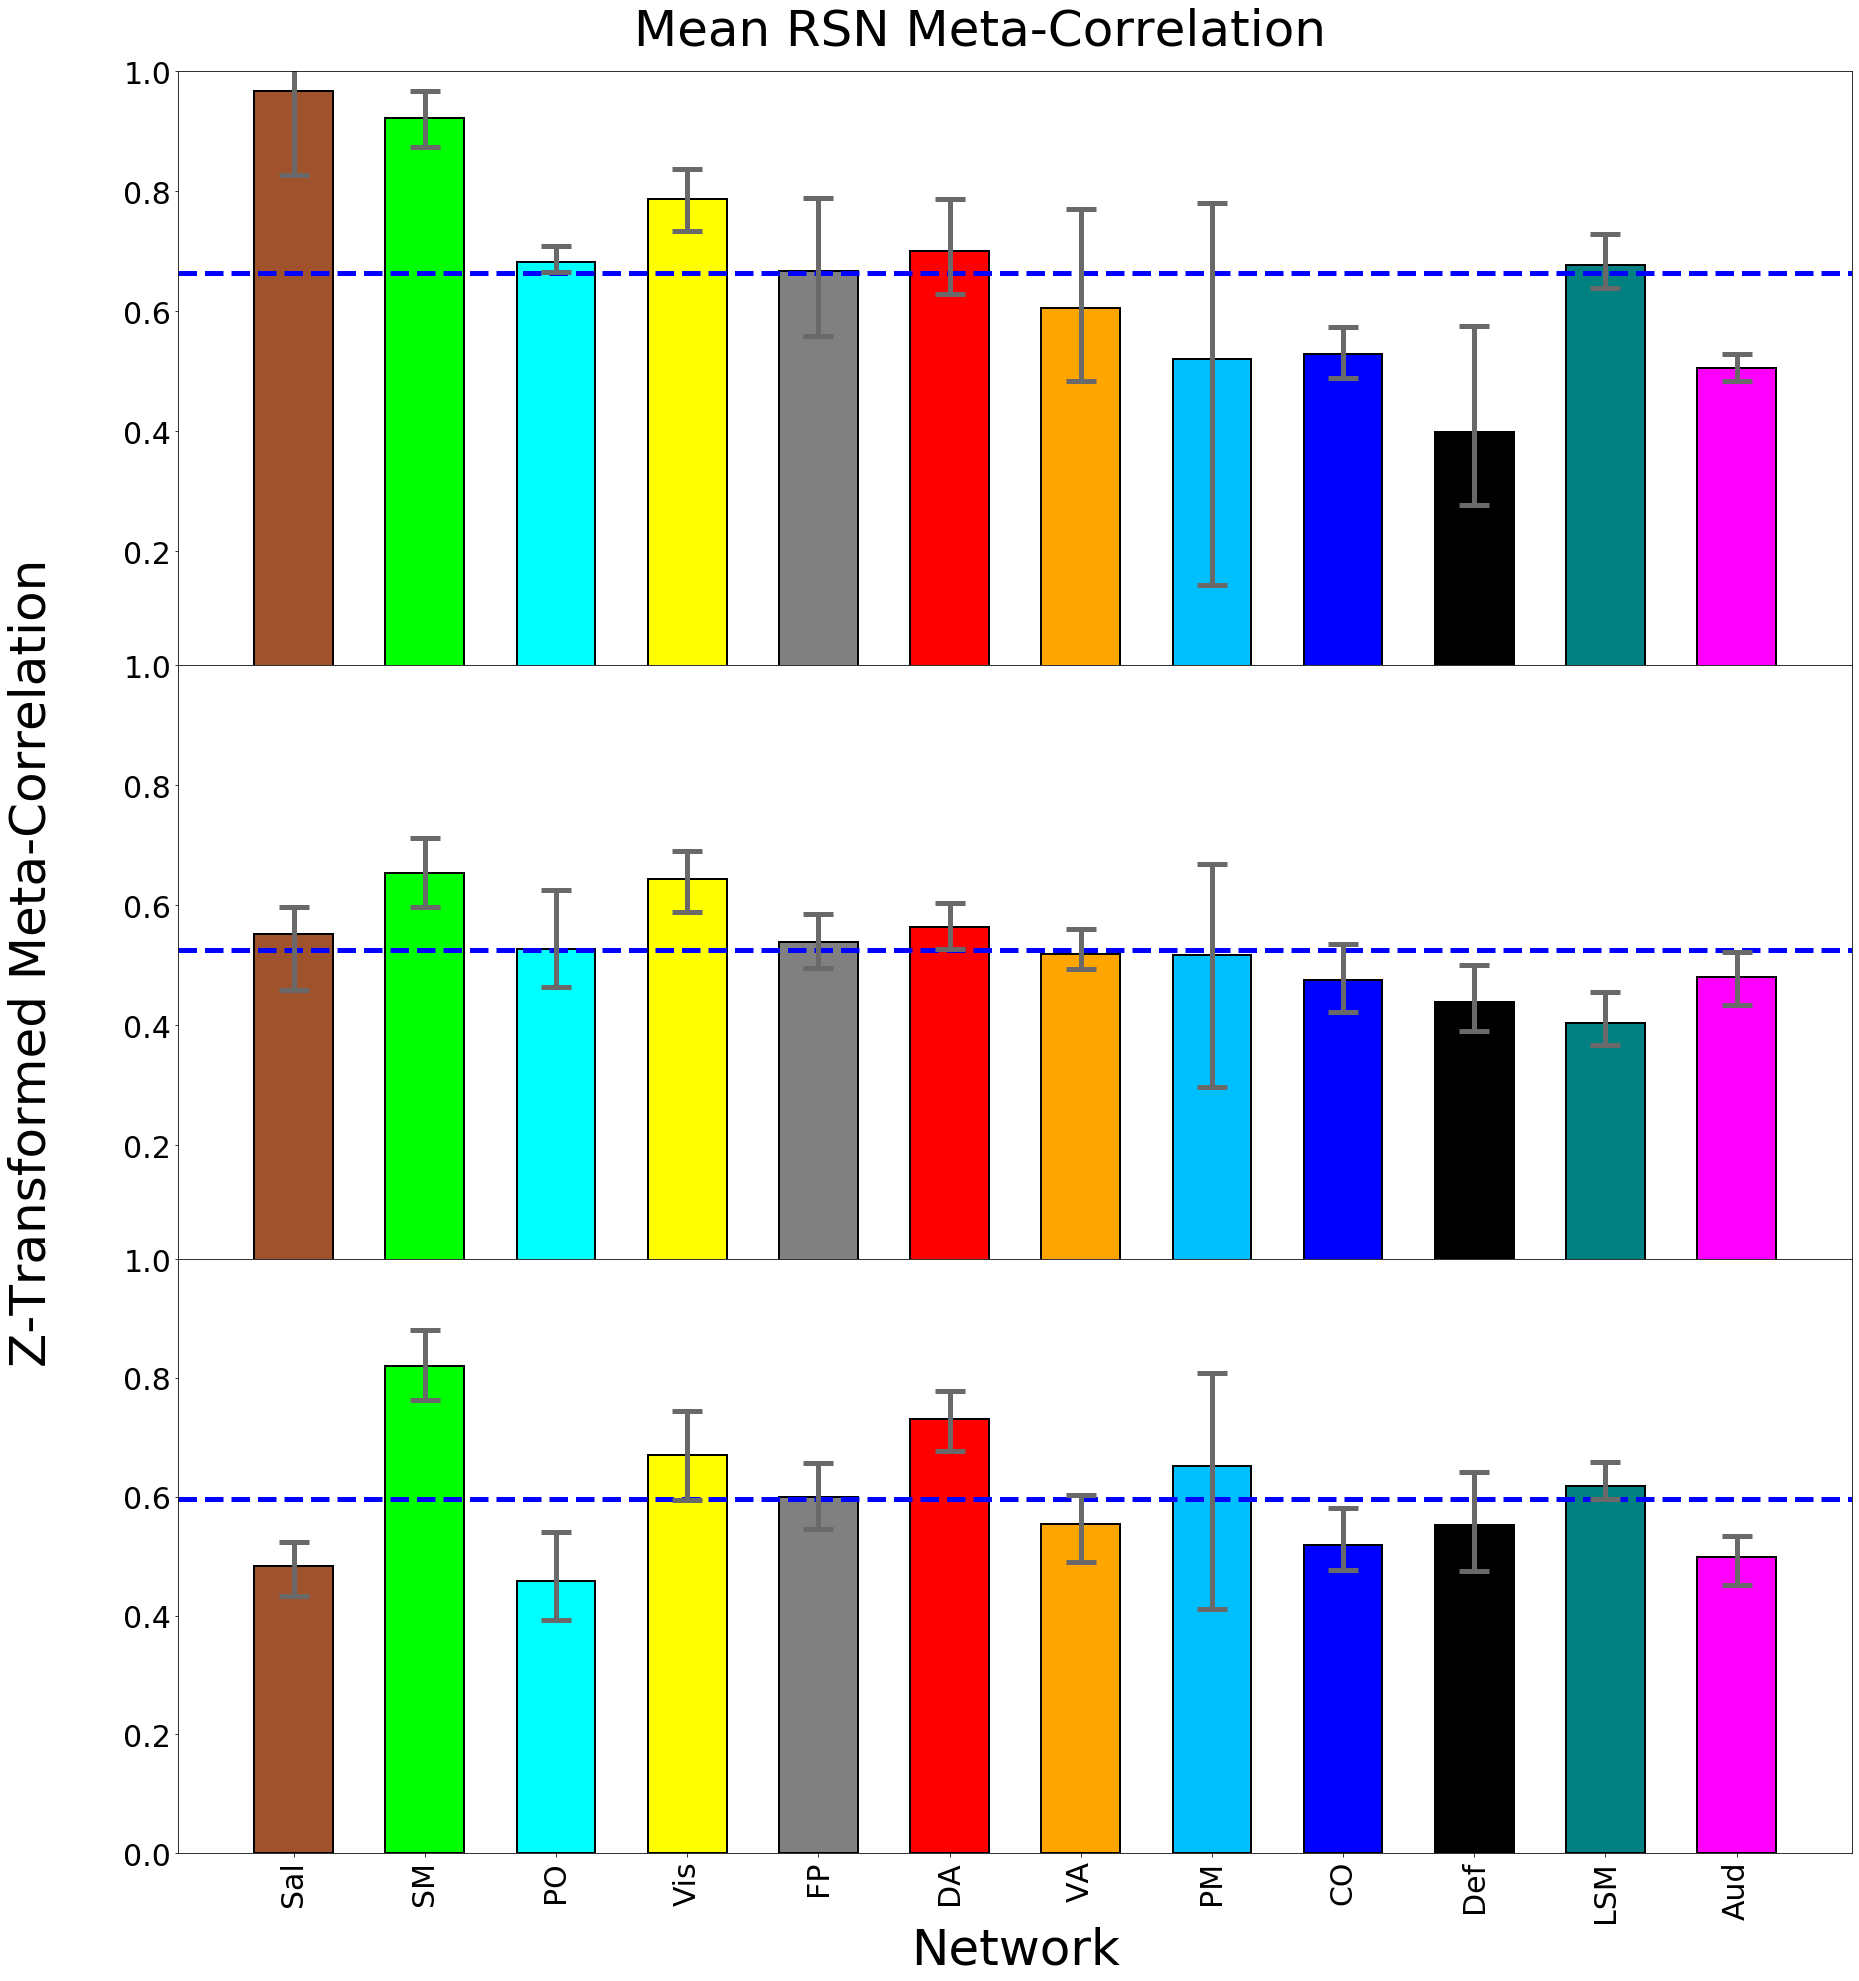

In [22]:
#Plotting for Meta-Correlations
plt.figure(figsize=(30,30))
ax1 = plt.subplot(3, 1, 1)
plt.bar(labels, new_plot_list[0][1], yerr=ci_list_all[0], capsize=15, error_kw=dict(ecolor='dimgrey',lw=5,capthick=5), align='center', zorder=2, color=colors, edgecolor='black', linewidth=2, width=0.6)
plt.xticks(rotation=90)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.ylim(0.01, 1.0)
plt.axhline(y=np.mean(new_plot_list[0][1]), color='b', linestyle='--', linewidth=5)

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
plt.bar(labels, new_plot_list[1][1], yerr=ci_list_all[1], capsize=15, error_kw=dict(ecolor='dimgrey',lw=5,capthick=5), align='center', zorder=2, color=colors, edgecolor='black', linewidth=2, width=0.6)
plt.xticks(rotation=90)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.ylim(0.01, 1.0)
plt.axhline(y=np.mean(new_plot_list[1][1]), color='b', linestyle='--', linewidth=5)

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
plt.bar(labels, new_plot_list[2][1], yerr=ci_list_all[2], capsize=15, error_kw=dict(ecolor='dimgrey',lw=5,capthick=5), align='center', zorder=2, color=colors, edgecolor='black', linewidth=2, width=0.6)
plt.xticks(rotation=90)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.ylim(0, 1.0)
plt.axhline(y=np.mean(new_plot_list[2][1]), color='b', linestyle='--', linewidth=5)
plt.xlabel('Network', size = 50)

plt.subplots_adjust(top = 0.95, hspace=0.0)
plt.suptitle('Mean RSN Meta-Correlation ', size = 50)
plt.text(-2.0,1.5, "Z-Transformed Meta-Correlation", ha="center", va="center", rotation=90, size = 50)
plt.savefig('/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Mean_Meta-Corr_Gordon_RSNs_Ma_Method_ROI.pdf', bbox_inches='tight')
plt.show()

# The following makes a scatter plot comparing our network MFMC's to those from Ma and Zhang. 

Note: Should used un-weighted network averages here, to match Ma and Zang. 

In [67]:
#This block of code makes the order of the networks be the same in the 3 plots.
mfmc_plot_order = plot_list[0][0]
mfmc_plot_values = plot_list[0][1]
tfmc_plot_order = plot_list[1][0]
tfmc_plot_values = plot_list[1][1]
mtmc_plot_order = plot_list[2][0]
mtmc_plot_values = plot_list[2][1]

new_tfmc_plot_order, new_tfmc_plot_values, new_mtmc_plot_order, new_mtmc_plot_values = [], [], [], []
for net in mfmc_plot_order:
    for i in range(len(mfmc_plot_order)):
        if tfmc_plot_order[i] == net:
            new_tfmc_plot_order.append(net)
            new_tfmc_plot_values.append(tfmc_plot_values[i])
        if mtmc_plot_order[i] == net:
            new_mtmc_plot_order.append(net)
            new_mtmc_plot_values.append(mtmc_plot_values[i])
            
new_plot_list = [[mfmc_plot_order, mfmc_plot_values], [new_tfmc_plot_order, new_tfmc_plot_values], 
                 [new_mtmc_plot_order, new_mtmc_plot_values]]

print(new_plot_list)

[[['Salience', 'Visual', 'SomoMoto', 'ParietoOccip', 'FrontoParietal', 'DorsalAttn', 'Default', 'VentralAttn', 'CinguloOperc', 'ParietalMem', 'LatSomoMoto', 'Auditory'], [0.9250540883423908, 0.6997718232735348, 0.6909626470060334, 0.6811663807328792, 0.6653596326541945, 0.6402180449713715, 0.6330149727353165, 0.6079646656713543, 0.5708243039507852, 0.5394080990852288, 0.5100511164152212, 0.39615518613384254]], [['Salience', 'Visual', 'SomoMoto', 'ParietoOccip', 'FrontoParietal', 'DorsalAttn', 'Default', 'VentralAttn', 'CinguloOperc', 'ParietalMem', 'LatSomoMoto', 'Auditory'], [0.20234445759466202, 0.19106943413275673, 0.31576202765164385, 0.2191091723002605, 0.18643376042845725, 0.19153162378274527, 0.1899118444248666, 0.221465061568077, 0.18963479237271802, 0.18343855748406085, 0.2261375371166145, 0.18561056968195436]], [['Salience', 'Visual', 'SomoMoto', 'ParietoOccip', 'FrontoParietal', 'DorsalAttn', 'Default', 'VentralAttn', 'CinguloOperc', 'ParietalMem', 'LatSomoMoto', 'Auditory']

In [68]:
orig_corr = new_plot_list[0][1]
orig_order = new_plot_list[0][0]
ma_zhang_corr = [0.59, 0.57, 0.51, 0.45, 0.39, 0.32, 0.31, 0.29, 0.26, 0.22, 0.2, 0.19]
ma_zhang_order = ['Visual', 'SomoMoto', 'LatSomoMoto', 'Auditory', 'ParietoOccip', 'DorsalAttn', 'VentralAttn', 
                  'Salience', 'FrontoParietal', 'Default', 'CinguloOperc', 'ParietalMem']
ma_zhang_labels = ['Vis', 'SM', 'LSM', 'Aud', 'PO', 'DA', 'VA', 'Sal', 'FP', 'Def', 'CO', 'PM']

print(len(orig_corr))
print(len(orig_order))
print(len(ma_zhang_corr))
print(len(ma_zhang_order))
print(len(ma_zhang_labels))

12
12
12
12
12


In [69]:
sorted_ma_zhang_order = []
sorted_ma_zhang_corr = []
sorted_labels = []
for i in range(len(orig_order)):
    net_name = orig_order[i]
    net_index = ma_zhang_order.index(net_name)
    ma_zhang_net_name = ma_zhang_order[net_index]
    ma_zhang_val =  ma_zhang_corr[net_index]
    ma_zhang_label =  ma_zhang_labels[net_index]
    sorted_ma_zhang_order.append(ma_zhang_net_name)
    sorted_ma_zhang_corr.append(ma_zhang_val)
    sorted_labels.append(ma_zhang_label)

print(len(sorted_ma_zhang_order))
print(sorted_ma_zhang_order)
print(len(sorted_ma_zhang_corr))
print(sorted_ma_zhang_corr)
print(len(sorted_labels))
print(sorted_labels)
print(len(orig_corr))
print(orig_corr)

corr = np.corrcoef(orig_corr, sorted_ma_zhang_corr)[0][1]
print(corr)

12
['Salience', 'Visual', 'SomoMoto', 'ParietoOccip', 'FrontoParietal', 'DorsalAttn', 'Default', 'VentralAttn', 'CinguloOperc', 'ParietalMem', 'LatSomoMoto', 'Auditory']
12
[0.29, 0.59, 0.57, 0.39, 0.26, 0.32, 0.22, 0.31, 0.2, 0.19, 0.51, 0.45]
12
['Sal', 'Vis', 'SM', 'PO', 'FP', 'DA', 'Def', 'VA', 'CO', 'PM', 'LSM', 'Aud']
12
[0.9250540883423908, 0.6997718232735348, 0.6909626470060334, 0.6811663807328792, 0.6653596326541945, 0.6402180449713715, 0.6330149727353165, 0.6079646656713543, 0.5708243039507852, 0.5394080990852288, 0.5100511164152212, 0.39615518613384254]
-0.038481308348205914


In [72]:
colors = []

for entry in sorted_ma_zhang_order:
    if entry == 'Salience':
        color = (160,82,45)
    if entry == 'VentralAttn':
        color = (255,165,0)
    if entry == 'Default':
        color = (0,0,0)
    if entry == 'FrontoParietal':
        color = (128,128,128)
    if entry == 'SomoMoto':
        color = (0,255,0)
    if entry == 'Visual':
        color = (255,255,0)
    if entry == 'DorsalAttn':
        color = (255,0,0)
    if entry == 'ParietoOccip':
        color = (0,255,255)
    if entry == 'CinguloOperc':
        color = (0,0,255)
    if entry == 'ParietalMem':
        color = (0,191,255)
    if entry == 'LatSomoMoto':
        color = (0,128,128)
    if entry == 'Auditory':
        color = (255,0,255)
    colors.append(color)

colors = list(np.array(colors)/255.0)

In [74]:
plot_labels = ['Salience', 'Visual', 'Somato-motor', 'Parieto-occipital', 'Fronto-parietal', 'Dorsal Att.',
               'Default', 'Ventral Att.', 'Cingulo-opercular', 'Parietal Memory', 'Lat. Somato-motor', 'Auditory']

In [75]:
# sensory_motor netowrks = SM, LSM, Visual, Aud
sm_indices = [1, 2, 10, 11]
non_sm_indices = [0, 3, 4, 5, 6, 7, 8, 9]

sm_orig_order = [orig_order[i] for i in sm_indices]
sm_orig_corr = [orig_corr[i] for i in sm_indices]
sm_sorted_ma_zhang_order = [sorted_ma_zhang_order[i] for i in sm_indices]
sm_sorted_ma_zhang_corr = [sorted_ma_zhang_corr[i] for i in sm_indices]
sm_plot_labels = [plot_labels[i] for i in sm_indices]
sm_colors = [colors[i] for i in sm_indices]

print(sm_orig_order)
print(sm_orig_corr)
print(sm_sorted_ma_zhang_order)
print(sm_sorted_ma_zhang_corr)
print(sm_plot_labels)
print(sm_colors)

non_sm_orig_order = [orig_order[i] for i in non_sm_indices]
non_sm_orig_corr = [orig_corr[i] for i in non_sm_indices]
non_sm_sorted_ma_zhang_order = [sorted_ma_zhang_order[i] for i in non_sm_indices]
non_sm_sorted_ma_zhang_corr = [sorted_ma_zhang_corr[i] for i in non_sm_indices]
non_sm_plot_labels = [plot_labels[i] for i in non_sm_indices]
non_sm_colors = [colors[i] for i in non_sm_indices]

print(non_sm_orig_order)
print(non_sm_orig_corr)
print(non_sm_sorted_ma_zhang_order)
print(non_sm_sorted_ma_zhang_corr)
print(non_sm_plot_labels)
print(non_sm_colors)

['Visual', 'SomoMoto', 'LatSomoMoto', 'Auditory']
[0.6997718232735348, 0.6909626470060334, 0.5100511164152212, 0.39615518613384254]
['Visual', 'SomoMoto', 'LatSomoMoto', 'Auditory']
[0.59, 0.57, 0.51, 0.45]
['Visual', 'Somato-motor', 'Lat. Somato-motor', 'Auditory']
[array([1., 1., 0.]), array([0., 1., 0.]), array([0.        , 0.50196078, 0.50196078]), array([1., 0., 1.])]
['Salience', 'ParietoOccip', 'FrontoParietal', 'DorsalAttn', 'Default', 'VentralAttn', 'CinguloOperc', 'ParietalMem']
[0.9250540883423908, 0.6811663807328792, 0.6653596326541945, 0.6402180449713715, 0.6330149727353165, 0.6079646656713543, 0.5708243039507852, 0.5394080990852288]
['Salience', 'ParietoOccip', 'FrontoParietal', 'DorsalAttn', 'Default', 'VentralAttn', 'CinguloOperc', 'ParietalMem']
[0.29, 0.39, 0.26, 0.32, 0.22, 0.31, 0.2, 0.19]
['Salience', 'Parieto-occipital', 'Fronto-parietal', 'Dorsal Att.', 'Default', 'Ventral Att.', 'Cingulo-opercular', 'Parietal Memory']
[array([0.62745098, 0.32156863, 0.17647059])

In [76]:
sm_corr = np.corrcoef(sm_orig_corr, sm_sorted_ma_zhang_corr)[0][1]
non_sm_corr = np.corrcoef(non_sm_orig_corr, non_sm_sorted_ma_zhang_corr)[0][1]
sm_corr, non_sm_corr

(0.9912906060518246, 0.39026678561338574)

Overall Correlation =  -0.038481308348205914
Sensory/Motor Correlation =  0.9912906060518246
Association Correlation =  0.39026678561338574


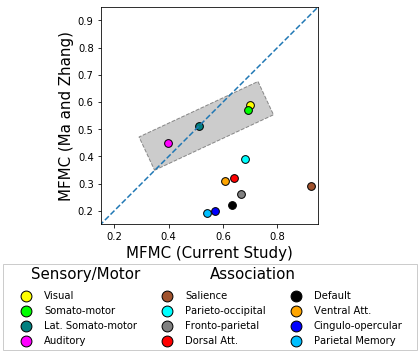

In [77]:
# adds horizonal legend
fig, ax = plt.subplots()
ax.set_xlabel('MFMC (Current Study)', fontsize=15)
ax.set_ylabel('MFMC (Ma and Zhang)', fontsize=15)
title = 'All Corr. = ' + str(round(corr, 3)) + '\nSM Corr. = ' + str(round(sm_corr, 3)) + '\nNon-SM Corr. = ' + str(round(non_sm_corr, 3))
print('Overall Correlation = ', corr)
print('Sensory/Motor Correlation = ', sm_corr)
print('Association Correlation = ', non_sm_corr)
# ax.set_title(title, size=15)
ax.axis('square')
ax.set_xlim(0.15, 0.95)
ax.set_ylim(0.15, 0.95)
plt.annotate("Sensory/Motor", xy=(-0.32,-0.25),xycoords='axes fraction', fontsize=15)
plt.annotate("Association", xy=(0.5,-0.25),xycoords='axes fraction', fontsize=15)
plt.annotate("             ", xy=(0.2,0.3),xycoords='axes fraction', fontsize=30, rotation=25, zorder=0,
              bbox=dict(facecolor='grey', linestyle='--', alpha=0.4))
plt.annotate("                ", xy=(-0.43,-0.48),xycoords='axes fraction', fontsize=80, zorder=0,
              bbox=dict(facecolor='white', alpha=0.2))
for i in range(len(sm_orig_corr)):
    ax.scatter(sm_orig_corr[i], sm_sorted_ma_zhang_corr[i], color=sm_colors[i], label=sm_plot_labels[i], s=60, edgecolors='black')
for i in range(len(non_sm_orig_corr)):
    ax.scatter(non_sm_orig_corr[i], non_sm_sorted_ma_zhang_corr[i], color=non_sm_colors[i], label=non_sm_plot_labels[i], s=60, edgecolors='black')
leg = ax.legend(bbox_to_anchor=(.5, -.6), loc='lower center', ncol=3, markerscale=1.4, frameon=False)
ax.plot([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,1.1,1.2], [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,1.1,1.2], '--')
plt.savefig('/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/MFMC_Both_Demeaned_Gordon_RSNs_Ma_Method_MZ_Comparison.pdf', bbox_inches='tight')

T-test on Network Differences

In [78]:
#All Networks
print(len(sorted_ma_zhang_corr))
print(sorted_ma_zhang_corr)
print(len(orig_corr))
print(orig_corr)

#Mean and Std dev
print(np.mean(sorted_ma_zhang_corr), np.std(sorted_ma_zhang_corr))
print(np.mean(orig_corr), np.std(orig_corr))

stats.ttest_rel(orig_corr, sorted_ma_zhang_corr)

12
[0.29, 0.59, 0.57, 0.39, 0.26, 0.32, 0.22, 0.31, 0.2, 0.19, 0.51, 0.45]
12
[0.9250540883423908, 0.6997718232735348, 0.6909626470060334, 0.6811663807328792, 0.6653596326541945, 0.6402180449713715, 0.6330149727353165, 0.6079646656713543, 0.5708243039507852, 0.5394080990852288, 0.5100511164152212, 0.39615518613384254]
0.3583333333333334 0.13588189316052704
0.6299959134143461 0.12277642630034025


Ttest_relResult(statistic=4.828362216007021, pvalue=0.000528750060812062)

In [79]:
#Association Networks
print(len(non_sm_sorted_ma_zhang_corr))
print(non_sm_sorted_ma_zhang_corr)
print(len(non_sm_orig_corr))
print(non_sm_orig_corr)

#Mean and Std dev
print(np.mean(non_sm_sorted_ma_zhang_corr), np.std(non_sm_sorted_ma_zhang_corr))
print(np.mean(non_sm_orig_corr), np.std(non_sm_orig_corr))

stats.ttest_rel(non_sm_orig_corr, non_sm_sorted_ma_zhang_corr)

8
[0.29, 0.39, 0.26, 0.32, 0.22, 0.31, 0.2, 0.19]
8
[0.9250540883423908, 0.6811663807328792, 0.6653596326541945, 0.6402180449713715, 0.6330149727353165, 0.6079646656713543, 0.5708243039507852, 0.5394080990852288]
0.2725 0.06398241946034863
0.6578762735179401 0.11012279178330459


Ttest_relResult(statistic=9.8471894210442, pvalue=2.3677964090902506e-05)

In [80]:
#Sensory-Motor Networks
print(len(sm_sorted_ma_zhang_corr))
print(sm_sorted_ma_zhang_corr)
print(len(sm_orig_corr))
print(sm_orig_corr)

#Mean and Std dev
print(np.mean(sm_sorted_ma_zhang_corr), np.std(sm_sorted_ma_zhang_corr))
print(np.mean(sm_orig_corr), np.std(sm_orig_corr))

stats.ttest_rel(sm_orig_corr, sm_sorted_ma_zhang_corr)

4
[0.59, 0.57, 0.51, 0.45]
4
[0.6997718232735348, 0.6909626470060334, 0.5100511164152212, 0.39615518613384254]
0.53 0.054772255750516585
0.574235193207158 0.12768792874784235


Ttest_relResult(statistic=1.0389347339458677, pvalue=0.37521415732916924)

# These next few sections are code to create a .dscalar file for the netwrok parcellated data for viewing. 

In [ ]:
# print(len(voxel_data))
# out_voxel_data = np.array(voxel_data).reshape(1, 59412)
# np.shape(out_voxel_data)

In [10]:
# # Voxel-level template 
# voxel_template = nib.load('/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/test_data/R_AF1005_KRAA_000508_01.SmoothedMyelinMap.32k_fs_LR.dscalar.nii')
# print(voxel_template)
# print(voxel_template.header)
# print(voxel_template.shape)

# out = nib.Cifti2Image(out_voxel_data, header=voxel_template.header)
# print(out.shape)
# nib.save(out, '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/FC_Orig_Myelin_Corr_Ma_Zhang_Gordon.32k_fs_LR.dscalar.nii')

In [11]:
# path = '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/'
# surf_left = path + 'test_data/R_AF1005_KRAA_000508_01.L.very_inflated.32k_fs_LR.surf.gii'
# surf_right = path + 'test_data/R_AF1005_KRAA_000508_01.R.very_inflated.32k_fs_LR.surf.gii'
# surf_parc = path + 'test_data/Paper_Surface_Files/Gordon333_FreesurferSubcortical.32k_fs_LR.dlabel.nii'
# # surf_voxel_data = path + 'Myelin_FC_Group_Correlation_Maps/FC_Myelin_Corr.32k_fs_LR.dscalar.nii'
# surf_voxel_data = '/Users/neurogazer/Downloads/FC_Myelin_Org_Corr.32k_fs_LR.dscalar.nii'
# surf_roi_data = path + 'FC_Orig_Myelin_Corr_Ma_Zhang_Gordon.32k_fs_LR.dscalar.nii'

In [12]:
# cmd="wb_view {} {} {} {} {}".format(surf_left, surf_right, surf_parc, surf_voxel_data, surf_roi_data)
# cmd=cmd.split()
# sp.call(cmd)

# The following makes a scatter plots comparing network meta-correaltion between young and old subgroups

In [52]:
plot_list

[[['SomoMoto',
   'DorsalAttn',
   'LatSomoMoto',
   'Visual',
   'FrontoParietal',
   'ParietalMem',
   'VentralAttn',
   'Default',
   'CinguloOperc',
   'Auditory',
   'ParietoOccip',
   'Salience'],
  [0.7694195897428454,
   0.6154518382897299,
   0.5802747569591955,
   0.5569736779951738,
   0.503657032410751,
   0.47493090704241825,
   0.4278251808275496,
   0.42029900203584614,
   0.41354670422196765,
   0.4081059534342582,
   0.3529637802536066,
   0.34593462036252076]],
 [['SomoMoto',
   'ParietalMem',
   'DorsalAttn',
   'Visual',
   'LatSomoMoto',
   'Default',
   'VentralAttn',
   'FrontoParietal',
   'CinguloOperc',
   'Salience',
   'Auditory',
   'ParietoOccip'],
  [0.6528403928787807,
   0.6124033826360289,
   0.5906006464564479,
   0.5717882657120765,
   0.5353142106886172,
   0.5033912398315376,
   0.49943857565511474,
   0.49849137389355475,
   0.45091833690710226,
   0.44782566898275794,
   0.4227823813502225,
   0.4072746804095988]]]

In [53]:
#This block of code makes the order of the networks be the same in the 2 plots.
order = ['Salience', 'SomoMoto',  'ParietoOccip', 'Visual', 'FrontoParietal', 'DorsalAttn', 'VentralAttn', 
         'ParietalMem', 'CinguloOperc', 'Default', 'LatSomoMoto', 'Auditory']
g1_plot_order = plot_list[0][0]
g1_plot_values = plot_list[0][1]
g2_plot_order = plot_list[1][0]
g2_plot_values = plot_list[1][1]

new_g1_plot_order, new_g1_plot_values, new_g2_plot_order, new_g2_plot_values  = [], [], [], []
for net in order:
    for i in range(len(order)):
        if g1_plot_order[i] == net:
            new_g1_plot_order.append(net)
            new_g1_plot_values.append(g1_plot_values[i])
        if g2_plot_order[i] == net:
            new_g2_plot_order.append(net)
            new_g2_plot_values.append(g2_plot_values[i])
            
new_plot_list = [[new_g1_plot_order, new_g1_plot_values], [new_g2_plot_order, new_g2_plot_values]]
print(new_plot_list)

[[['Salience', 'SomoMoto', 'ParietoOccip', 'Visual', 'FrontoParietal', 'DorsalAttn', 'VentralAttn', 'ParietalMem', 'CinguloOperc', 'Default', 'LatSomoMoto', 'Auditory'], [0.34593462036252076, 0.7694195897428454, 0.3529637802536066, 0.5569736779951738, 0.503657032410751, 0.6154518382897299, 0.4278251808275496, 0.47493090704241825, 0.41354670422196765, 0.42029900203584614, 0.5802747569591955, 0.4081059534342582]], [['Salience', 'SomoMoto', 'ParietoOccip', 'Visual', 'FrontoParietal', 'DorsalAttn', 'VentralAttn', 'ParietalMem', 'CinguloOperc', 'Default', 'LatSomoMoto', 'Auditory'], [0.44782566898275794, 0.6528403928787807, 0.4072746804095988, 0.5717882657120765, 0.49849137389355475, 0.5906006464564479, 0.49943857565511474, 0.6124033826360289, 0.45091833690710226, 0.5033912398315376, 0.5353142106886172, 0.4227823813502225]]]


In [54]:
colors = []

for entry in new_g1_plot_order:
    if entry == 'Salience':
        color = (160,82,45)
    if entry == 'VentralAttn':
        color = (255,165,0)
    if entry == 'Default':
        color = (0,0,0)
    if entry == 'FrontoParietal':
        color = (128,128,128)
    if entry == 'SomoMoto':
        color = (0,255,0)
    if entry == 'Visual':
        color = (255,255,0)
    if entry == 'DorsalAttn':
        color = (255,0,0)
    if entry == 'ParietoOccip':
        color = (0,255,255)
    if entry == 'CinguloOperc':
        color = (0,0,255)
    if entry == 'ParietalMem':
        color = (0,191,255)
    if entry == 'LatSomoMoto':
        color = (0,128,128)
    if entry == 'Auditory':
        color = (255,0,255)
    colors.append(color)

colors = list(np.array(colors)/255.0)

In [55]:
a1 = new_plot_list[0][1]  
b1 = new_plot_list[1][1]

print(a1)
print(b1)

[0.34593462036252076, 0.7694195897428454, 0.3529637802536066, 0.5569736779951738, 0.503657032410751, 0.6154518382897299, 0.4278251808275496, 0.47493090704241825, 0.41354670422196765, 0.42029900203584614, 0.5802747569591955, 0.4081059534342582]
[0.44782566898275794, 0.6528403928787807, 0.4072746804095988, 0.5717882657120765, 0.49849137389355475, 0.5906006464564479, 0.49943857565511474, 0.6124033826360289, 0.45091833690710226, 0.5033912398315376, 0.5353142106886172, 0.4227823813502225]


In [45]:
# MFMC Diffs
diff_list = []
for i in range(len(a1)):
    diff = np.abs(a1[i] - b1[i])
    print(order[i], diff)
    diff_list.append(diff)
print(np.max(diff_list))

Salience 0.012389538562857627
SomoMoto 0.10815090558998441
ParietoOccip 0.06416152324952273
Visual 0.03244639559556739
FrontoParietal 0.0978294688200666
DorsalAttn 0.07009512688355579
VentralAttn 0.056013946366061385
ParietalMem 0.062050790800811495
CinguloOperc 0.05288441001920263
Default 0.04230996305799939
LatSomoMoto 0.04520927356843896
Auditory 0.09244612990604245
0.10815090558998441


In [36]:
# TFMC Diffs
diff_list = []
for i in range(len(a1)):
    diff = np.abs(a1[i] - b1[i])
    print(order[i], diff)
    diff_list.append(diff)
print(np.max(diff_list))

Salience 0.031576833924863046
SomoMoto 0.18440605053037634
ParietoOccip 0.02474232761091555
Visual 0.0363343945255703
FrontoParietal 0.031070986725673322
DorsalAttn 0.03998909347478624
VentralAttn 0.09373488524345319
ParietalMem 0.0853281264556165
CinguloOperc 0.05656046338209575
Default 0.03438255329377887
LatSomoMoto 0.25419625908447363
Auditory 0.0629742364198046
0.25419625908447363


In [56]:
# MTMC Diffs
diff_list = []
for i in range(len(a1)):
    diff = np.abs(a1[i] - b1[i])
    print(order[i], diff)
    diff_list.append(diff)
print(np.max(diff_list))

Salience 0.10189104862023718
SomoMoto 0.1165791968640647
ParietoOccip 0.054310900155992214
Visual 0.014814587716902694
FrontoParietal 0.005165658517196248
DorsalAttn 0.024851191833281994
VentralAttn 0.07161339482756512
ParietalMem 0.13747247559361064
CinguloOperc 0.037371632685134604
Default 0.08309223779569141
LatSomoMoto 0.04496054627057833
Auditory 0.014676427915964296
0.13747247559361064


In [57]:
order1 = ['Salience', 'Somato-motor', 'Parieto-occipital', 'Visual', 'Fronto-parietal', 'Dorsal Att.', 'Ventral Att.', 
         'Parietal Memory', 'Cingulo-opercular', 'Default', 'Lat. Somato-motor', 'Auditory']

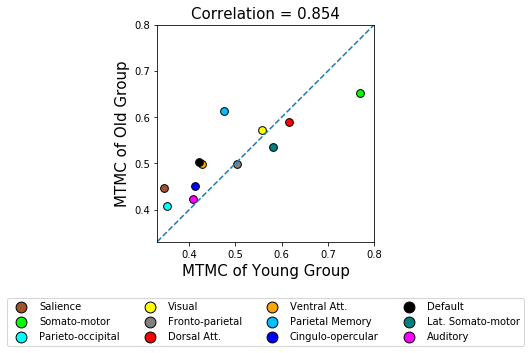

In [61]:
# adds horizonal legend
corr = np.corrcoef(a1, b1)[0][1]
fig, ax = plt.subplots()
for i in range(len(a1)):
    ax.scatter(a1[i], b1[i], color=colors[i], label=order1[i], s=60, edgecolors='black')
plt.xlabel('MTMC of Young Group', size=15)
plt.ylabel('MTMC of Old Group', size=15)
title = 'Correlation = ' + str(round(corr, 3))
plt.title(title, size=15)
plt.axis('square')
# plt.xlim(0.33, 0.94)
# plt.ylim(0.33, 0.94)
plt.xlim(0.33, 0.8)
plt.ylim(0.33, 0.8)
# plt.xlim(0.22, 0.72)
# plt.ylim(0.22, 0.72)
plt.legend(bbox_to_anchor=(.5, -.5), loc='lower center', ncol=4, markerscale=1.4)

plt.plot([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,1.1,1.2], [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,1.1,1.2], '--')

# for i, txt in enumerate(data_point_labels):
#     ax.annotate(txt, (a1[i], b1[i]), size=12)

plt.savefig('/Users/neurogazer/Downloads/MTMC_RSN_Young_Old_Gordon_ConfReg.pdf', bbox_inches='tight')

# Correlate mean myelin/thickness with age-coefs

In [81]:
myelin_mean_path = '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Standard_Brain_Maps/Mean_Myelin_Orig.32k_fs_LR.dscalar.nii'
myelin_mean = np.array(nib.load(myelin_mean_path).get_fdata())[0]
print(len(myelin_mean))

myelin_coef_path = '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Age_Regression/Myelin_Age_Coef_Orig.32k_fs_LR.dscalar.nii'
myelin_coef = np.array(nib.load(myelin_coef_path).get_fdata())[0]
print(len(myelin_coef))

stats.pearsonr(myelin_mean, myelin_coef)

59412
59412


(0.706688234029194, 0.0)

In [82]:
thickness_mean_path = '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Standard_Brain_Maps/Mean_Thickness_Orig.32k_fs_LR.dscalar.nii'
thickness_mean = np.array(nib.load(thickness_mean_path).get_fdata())[0]
print(len(thickness_mean))

thickness_coef_path = '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Age_Regression/Thickness_Age_Coef_Orig.32k_fs_LR.dscalar.nii'
thickness_coef = np.array(nib.load(thickness_coef_path).get_fdata())[0]
print(len(thickness_coef))

stats.pearsonr(thickness_mean, thickness_coef)

59412
59412


(-0.016436050879987667, 6.165012051043733e-05)